# Semana de Data Science

**Vendas de uma concessionária de veículos usados**

In [ ]:
# importando biblioteca pandas para analise dos dados
#importando biblioteca seaborn para auxiliar matplotlib na feração dos graficos
#importando biblioteca matplotlib para criação de graficos e gereção de dados

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
#lendo dados do meu disco

df = pd.read_excel('carros_usados.xls')

In [ ]:
# Visualizando as 5 primeiras linhas do Dataframe

df.head()

In [ ]:
# Visualizando as informações de colunas do Dataframe 

df.info()

In [ ]:
# Informações estatísticas das colunas Dataframe

df.describe()

In [7]:
# Consultado dados nulos da datafreme

df.isnull().sum()

data.set             0
total.cost           0
lot.sale.days        0
overage              0
mileage              0
vehicle.type         0
domestic.import      0
vehicle.age          0
vehicle.age.group    0
color.set            0
makex                0
state                0
make.model           0
dtype: int64

## `Análise Exploratória de Dados`

In [9]:
# define estilo para plots

plt.style.use('ggplot')

**Plota a distribuição da variável `total.cost`**

In [ ]:
#plota a distribuição da variavel total.cost

%matplotlib notebook
sns.distplot(df['total.cost'],color='green', kde=False)
plt.title('Distribuição da coluna total.cost')

#### `Conclusões`:

*Podemos observar que a maioria dos carros custam em torno de 3k e 6k.*

### Qual a quantidade média de dias que os carros ficam na concessionária?

In [ ]:
%matplotlib notebook
sns.distplot(df['lot.sale.days'],color='red', kde=False)
plt.title('Distribuição da coluna lot.sale.days')

#### `Conclusões`:

- *Podemos observar que os dias de vendas são inclinados para o lado esquerdo
 isso nos mostra que a maioria dos são vendidos nos primeiros 90 dias.*
- *Os restantes 20% são vendidos após 20 dias e são vendidos a preço de desconto.*

### Qual a Kilometragem média dos veículos da concessionária?

In [ ]:
%matplotlib notebook
sns.distplot(df['mileage'],color='blue', kde=False)
plt.title('Distribuição da coluna mileage')

#### `Conclusões`:

- *Podemos observar que a grande maioria dos veículos estão na faixa de 60.000 a 90.000 de kilometragem*

### Qual a idade média dos veículos da concessionária?

In [ ]:
%matplotlib notebook
sns.distplot(df['vehicle.age'],color='red', kde=False)
plt.title('Distribuição da coluna vehicle.age')

#### `Conclusões`:

- *Podemos observar que a idade média dos veículos da concessionária são de 3 a 7 anos.*

### Visualizando a Correlação entre algumas variáveis

- O quanto alguma variável numérica tem correlação com outra variável ?
- Correlação pode ser positiva ou negativa

In [ ]:
df[['mileage','vehicle.age','lot.sale.days','total.cost']].head()

- Calcula a correlação com método corr()

In [ ]:
df[['mileage','vehicle.age','lot.sale.days','total.cost']].corr()

In [ ]:
correlacoes = df[['mileage','vehicle.age','lot.sale.days','total.cost']].corr()

- Plot o mapa de calor para visualizar as correlações

In [ ]:
%matplotlib notebook
sns.heatmap(correlacoes, annot=True, cmap="YlGnBu")

#### `Conclusões`:

- *O gráfico de calor acima nos mostra que não existe uma correlação forte das variáveis com a quantidade de dias de vendas(lot.sale.days)*
- *Podemos ver que a kilometragem tem uma correlação positiva com a idade do veículo.*
- *Podemos ver também que os dias de vendas (lot.sale.days) tem uma correlação positiva com o custo total do veículo (total.cost) e com a idade do veículo (vehicle.age)*

### Visualizando a disperssão entre os dias de vendas e algumas variáveis

In [ ]:
%matplotlib notebook
sns.scatterplot(x='lot.sale.days', y="total.cost", data=df)

In [ ]:
%matplotlib notebook
sns.scatterplot(x='lot.sale.days', y="mileage", color='green', data=df)

### Tempo médio de vendas por tipos de Veiculos

In [ ]:
%matplotlib notebook
sns.boxplot(x="domestic.import", y="lot.sale.days", data=df)

### Tempo médio de vendas por categoria de Veiculos

<IPython.core.display.Javascript object>


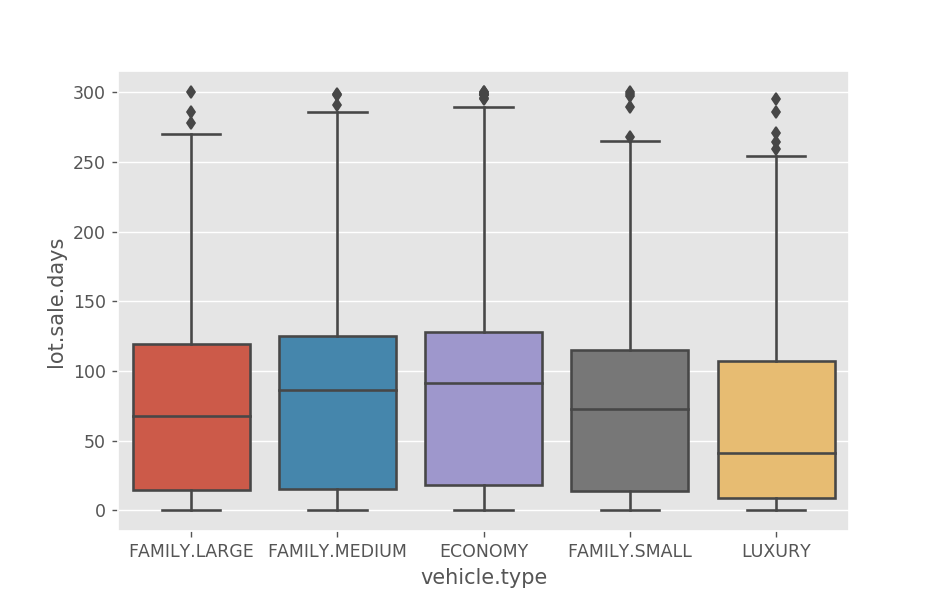

In [20]:
%matplotlib notebook
sns.boxplot(x="vehicle.type", y="lot.sale.days", data=df)

**`Conclusões`**:

- *Não existem diferenças significativas entre veículos domesticos e veículos importados em termos de quão rápido eles são vendidos.*
- *Veiculos econômicos demoram um pouco mais para serem vendidos se comparado veículos de família, de luxo ou sedans.*
- *Em média, leva 90 dias para vender veículos econômicos,  84 dias para vender veículos de família e 40 dias para vender veículos de luxo.*

### Tempo médio de vendas por cor de Veiculos

<IPython.core.display.Javascript object>


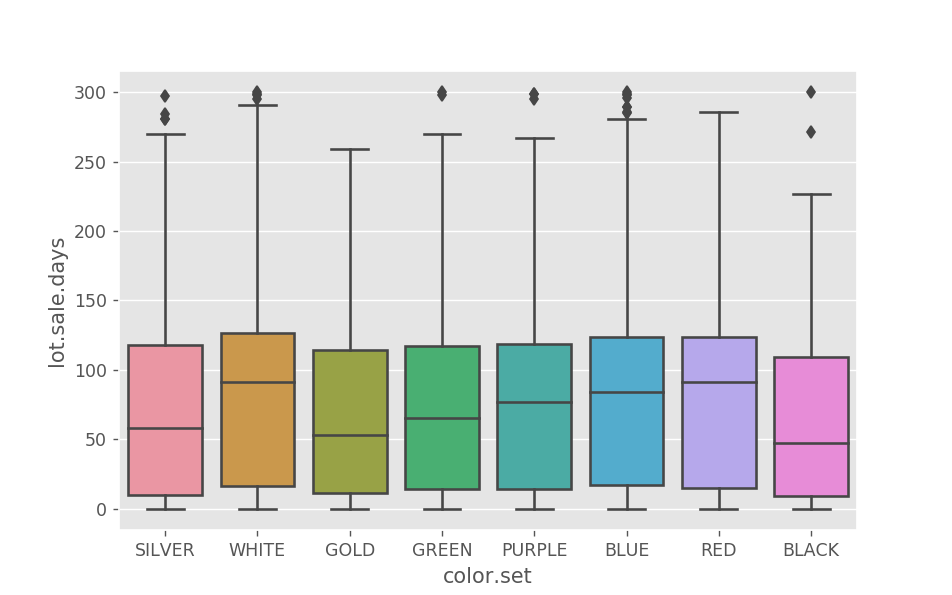

In [21]:
%matplotlib notebook
sns.boxplot(x="color.set", y="lot.sale.days", data=df)

**`Conclusões`**

- *Podemos observar que nesse gráfico que em média os carros que saem mais rápido são carros pretos.*
- *Em segundo lugar são carros dourados com 53 dias. Por fim os carros que demoram mais para serem vendidos são carros brancos com 90 dias*

### Tempo médio de vendas por marca dos Veiculos

<IPython.core.display.Javascript object>


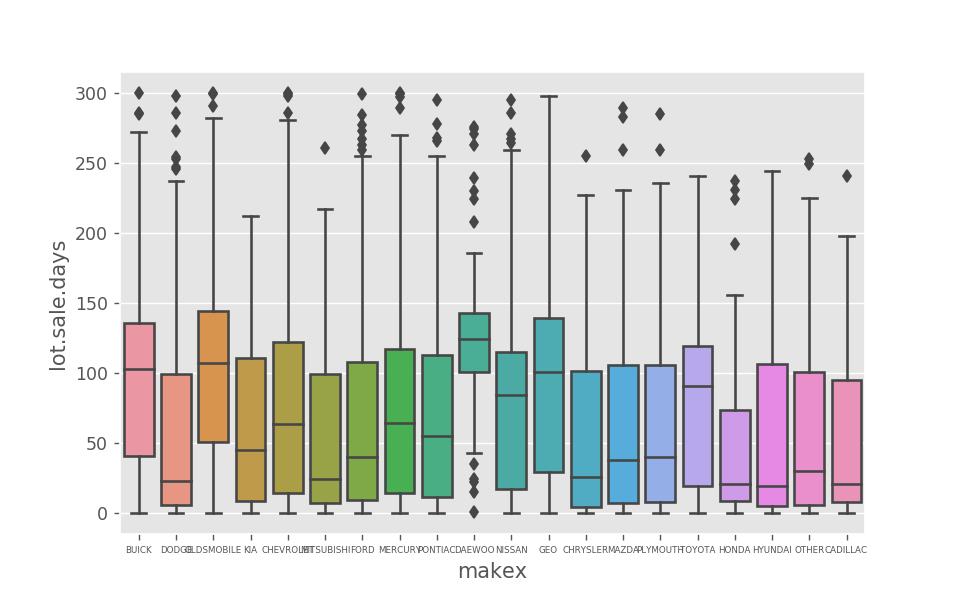

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

In [65]:
%matplotlib notebook
sns.boxplot(x="makex", y="lot.sale.days", data=df)
plt.xticks(size=5)

**`Conclusões:`**

- *Marcas tem uma grande diferença no tempo de vendas dos veículos.*
- *Algumas marcas de veículos quem vendem rápido tendem a ser Honda, Chrysler, Dodge, Hyundai, Plymouth.*
- *As marcas Daewoo, Oldsmobile, Buick e GEO permanecem por mais tempo antes de serem vendidos.*

### Tempo médio de vendas por estado

<IPython.core.display.Javascript object>


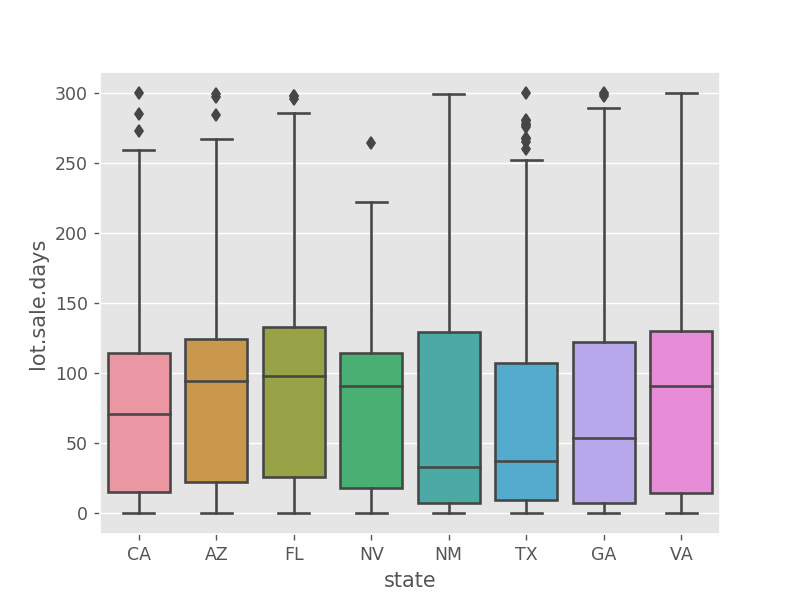

In [23]:
%matplotlib notebook
sns.boxplot(x="state", y="lot.sale.days", data=df)

#### `Conclusões`:

- *Alguns estados como California, Georgia e Texas tem diferença significante de dias para serem vendidos se comparado com Florida, Arizona e Nevada.*


### Construindo um Modelo de Machine Learning

In [28]:
df.head()

,total.cost,lot.sale.days,overage,mileage,vehicle.type,domestic.import,vehicle.age,color.set,makex,state,make.model
0,4037,135,YES,67341,FAMILY.LARGE,Domestic,8,SILVER,BUICK,CA,BUICK.CENTURY
1,6886,114,YES,72823,FAMILY.MEDIUM,Domestic,6,WHITE,DODGE,AZ,DODGE.NEON
2,3924,205,YES,96330,FAMILY.MEDIUM,Domestic,9,WHITE,OLDSMOBILE,FL,OLDSMOBILE.CUTLASS SUPREME
3,4636,100,YES,58519,ECONOMY,Import,4,GOLD,KIA,NV,KIA.SEPHIA
4,5080,129,YES,99057,FAMILY.MEDIUM,Domestic,4,GREEN,OLDSMOBILE,NV,OLDSMOBILE.CUTLASS SUPREME


**Pre-processando os dados**

- Precisamos pré-processar algumas colunas, pois, são colunas categóricas.
- Nesta etapa também removemos colunas não importantes para o modelo.

**Removendo a coluna vehicle.age.group**

In [25]:
df.drop('vehicle.age.group', axis=1, inplace=True)

In [27]:
df.drop('data.set', axis=1, inplace=True)

**Aplicando o LabelEncoder para codificação de variáveis categóricas**

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
label_encoder1 = LabelEncoder()
label_encoder2 = LabelEncoder()
label_encoder3 = LabelEncoder()
label_encoder4 = LabelEncoder()
label_encoder5 = LabelEncoder()
label_encoder6 = LabelEncoder()

**Aplica o Labelencoder nos dados categóricos**

In [31]:
df['vehicle.type'] = label_encoder1.fit_transform(df['vehicle.type'])
df['domestic.import'] = label_encoder2.fit_transform(df['domestic.import'])
df['color.set'] = label_encoder3.fit_transform(df['color.set'])
df['makex'] = label_encoder4.fit_transform(df['makex'])
df['state'] = label_encoder5.fit_transform(df['state'])
df['make.model'] = label_encoder6.fit_transform(df['make.model'])

**Dados transformados**

In [32]:
df.head()

,total.cost,lot.sale.days,overage,mileage,vehicle.type,domestic.import,vehicle.age,color.set,makex,state,make.model
0,4037,135,YES,67341,1,0,8,6,0,1,1
1,6886,114,YES,72823,2,0,6,7,5,0,33
2,3924,205,YES,96330,2,0,9,7,15,2,77
3,4636,100,YES,58519,0,1,4,2,10,5,54
4,5080,129,YES,99057,2,0,4,3,15,5,77


**Separa a classe dos dados**

In [33]:
y = df['overage']

In [34]:
y.head()

0    YES
1    YES
2    YES
3    YES
4    YES
Name: overage, dtype: object

**Apaga a coluna overage e a coluna lot.days.sales**

In [35]:
X = df.drop(['lot.sale.days','overage'], axis=1)

In [36]:
X.head()

,total.cost,mileage,vehicle.type,domestic.import,vehicle.age,color.set,makex,state,make.model
0,4037,67341,1,0,8,6,0,1,1
1,6886,72823,2,0,6,7,5,0,33
2,3924,96330,2,0,9,7,15,2,77
3,4636,58519,0,1,4,2,10,5,54
4,5080,99057,2,0,4,3,15,5,77


**Separando os dados de treino e teste**

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y)

In [39]:
X_treino.count()

total.cost         5621
mileage            5621
vehicle.type       5621
domestic.import    5621
vehicle.age        5621
color.set          5621
makex              5621
state              5621
make.model         5621
dtype: int64

In [40]:
y_treino.count()

5621

In [41]:
X_treino.head()

,total.cost,mileage,vehicle.type,domestic.import,vehicle.age,color.set,makex,state,make.model
1810,4380,55263,2,1,5,3,9,0,47
6676,4924,89301,2,0,4,7,6,2,41
3852,5705,57605,2,0,3,6,6,6,41
7065,4986,73386,2,0,4,3,6,0,41
4586,4347,52411,2,1,3,1,10,0,54


In [42]:
y_treino.head()

1810    YES
6676     NO
3852     NO
7065     NO
4586     NO
Name: overage, dtype: object

In [43]:
X_teste.count()

total.cost         1874
mileage            1874
vehicle.type       1874
domestic.import    1874
vehicle.age        1874
color.set          1874
makex              1874
state              1874
make.model         1874
dtype: int64

In [44]:
y_teste.count()

1874

In [45]:
X_teste.head()

,total.cost,mileage,vehicle.type,domestic.import,vehicle.age,color.set,makex,state,make.model
5042,4536,69595,0,0,4,0,6,3,39
2515,6384,71161,2,0,4,4,2,7,16
3548,3567,82884,4,1,9,2,14,7,67
3352,4948,83070,2,0,9,7,18,2,82
3093,5777,75988,0,0,3,1,5,6,33


**Aplicando Machine Learning com Arvore de Decisão**

In [47]:
from sklearn import tree

In [48]:
arvore = tree.DecisionTreeClassifier()

In [49]:
arvore.fit(X_treino, y_treino)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

**Validação do Modelo**

In [50]:
X_teste.head()

,total.cost,mileage,vehicle.type,domestic.import,vehicle.age,color.set,makex,state,make.model
5042,4536,69595,0,0,4,0,6,3,39
2515,6384,71161,2,0,4,4,2,7,16
3548,3567,82884,4,1,9,2,14,7,67
3352,4948,83070,2,0,9,7,18,2,82
3093,5777,75988,0,0,3,1,5,6,33


In [51]:
arvore.predict(X_teste)

array(['NO', 'NO', 'NO', ..., 'NO', 'YES', 'NO'], dtype=object)

In [52]:
resultado = arvore.predict(X_teste)

In [53]:
resultado

array(['NO', 'NO', 'NO', ..., 'NO', 'YES', 'NO'], dtype=object)

In [54]:
from sklearn import metrics
print(metrics.classification_report(y_teste,resultado))

              precision    recall  f1-score   support

          NO       0.64      0.64      0.64       999
         YES       0.58      0.58      0.58       875

   micro avg       0.61      0.61      0.61      1874
   macro avg       0.61      0.61      0.61      1874
weighted avg       0.61      0.61      0.61      1874



**`Conclusões`:**

- Tivemos uma precisão de 62% para classificar carros que superam os 90 dias.
- O modelo pode melhorar se trabalhar mais nos dados, e com um trabalho de engenharia de features.

**Features mais importantes para o modelo**

In [55]:
arvore.feature_importances_

array([0.27281384, 0.2393606 , 0.07459669, 0.01310003, 0.07839277,
       0.08136765, 0.04044059, 0.06467617, 0.13525166])

In [56]:
feature_imp = pd.Series(arvore.feature_importances_,index=X_treino.columns)

In [57]:
feature_imp

total.cost         0.272814
mileage            0.239361
vehicle.type       0.074597
domestic.import    0.013100
vehicle.age        0.078393
color.set          0.081368
makex              0.040441
state              0.064676
make.model         0.135252
dtype: float64

**Visualizando as Features mais importantes do Modelo**

<IPython.core.display.Javascript object>


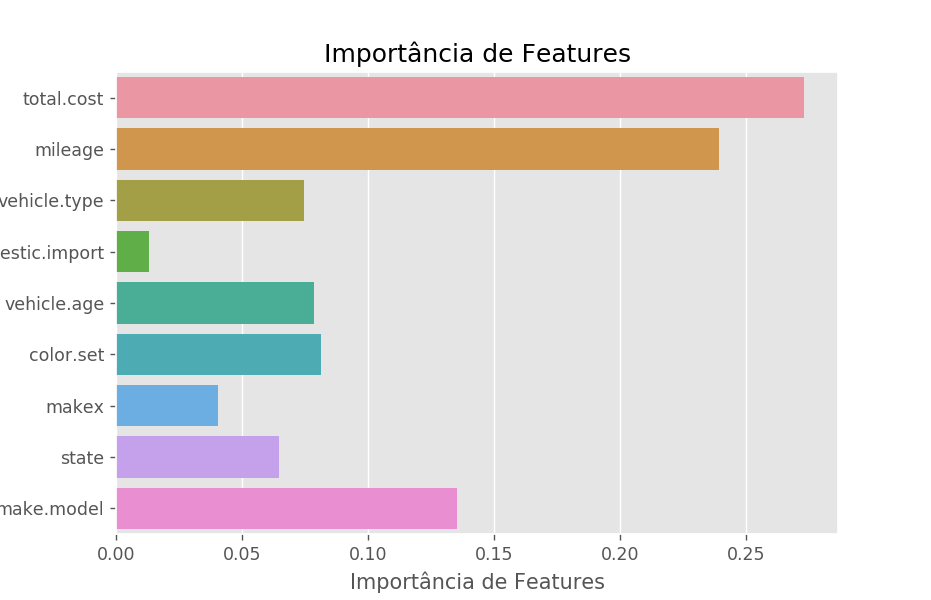

In [58]:
%matplotlib notebook
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Importância de Features')
plt.ylabel('Features')
plt.title("Importância de Features")
plt.show()

## Visualizando a árvore de Decisão

- Instala as bibliotecas para visualização no jupyter notebook

In [59]:
!pip install pydot
!pip install graphviz

In [60]:
import pydot
import graphviz 
from ipywidgets import interactive

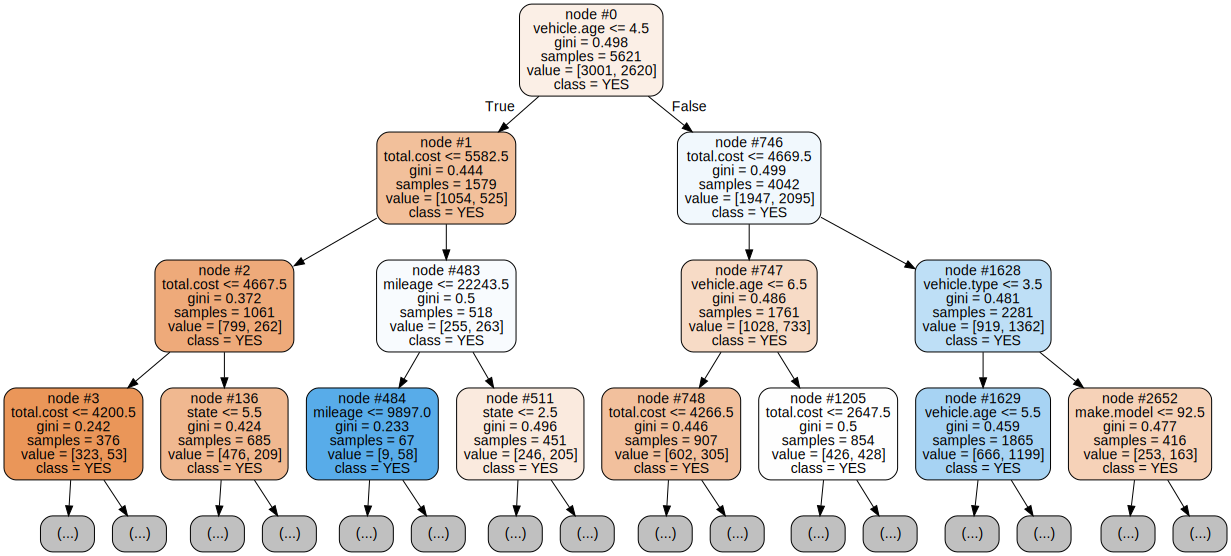

In [61]:
dot_data = tree.export_graphviz(
         arvore,
         feature_names=X.columns,
         class_names=y,
         max_depth=3, 
         filled=True, 
         rounded=True,
         node_ids=True,
         label='all',
        )  
graph = graphviz.Source(dot_data)  
graph

**`Conclusões`**

- *O nó que melhor separa os dados é o nó vehicle.age, em seguida o nó total.cost e mileage.*

**Minerando Dados**

www.minerandodados.com.br

In [14]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
